In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [237]:
# INITIALISE THE DEVIATION DATA

# Import csv file
cpu_times = pd.read_csv('cpu_times.csv')
# cpu_times

# find the average of all the average cpu times where number of aircraft is 5
num_aircraft = 6
average_average_cpu_time = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['average cpu time'].mean()
average_variance_cpu_time = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['cpu variance'].mean()
average_cost_of_replanning = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['cost of replanning'].mean()
total_number_of_plans = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['num replannings'].sum()

# *** INIT *** 
final_df = pd.DataFrame([[6, average_average_cpu_time, average_variance_cpu_time,  average_cost_of_replanning, total_number_of_plans]], columns=['number of aircraft', 'average cpu time', 'variance', 'cost of replanning', 'number of replannings'])

for i in range(6, 21, 2):
    num_aircraft = i
    average_average_cpu_time = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['average cpu time'].mean()
    average_variance_cpu_time = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['cpu variance'].mean()
    average_cost_of_replanning = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['cost of replanning'].mean()
    total_number_of_plans = cpu_times[cpu_times['number of aircraft'] == num_aircraft]['num replannings'].sum()

    final_df.loc[-1] = [num_aircraft, average_average_cpu_time, average_variance_cpu_time, average_cost_of_replanning, total_number_of_plans]   # adding a row
    final_df.index = final_df.index + 1                       # set the index
    final_df = final_df.sort_index()                          # sort the index

# remove the last row in final_df
final_df = final_df.drop(final_df.index[-1])
# final_df

In [238]:
# INITIALISE THE BENCHMARK DATA

cpu_times_no_dev = pd.read_csv('cpu_times_no_dev.csv')

num_aircraft = 6
average_average_cpu_time = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['average cpu time'].mean()
average_variance_cpu_time = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['cpu variance'].mean()
average_cost_of_replanning = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['cost of replanning'].mean()
total_number_of_plans = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['num replannings'].sum()
average_average_cpu_time, average_variance_cpu_time, average_cost_of_replanning, total_number_of_plans

# *** INIT *** 
final_df_no_dev = pd.DataFrame([[6, average_average_cpu_time, average_variance_cpu_time,  average_cost_of_replanning, total_number_of_plans]], columns=['number of aircraft', 'average cpu time', 'variance', 'cost of replanning', 'number of replannings'])
for i in range(6, 21, 2):
    num_aircraft = i
    average_average_cpu_time = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['average cpu time'].mean()
    average_variance_cpu_time = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['cpu variance'].mean()
    average_cost_of_replanning = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['cost of replanning'].mean()
    total_number_of_plans = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] == num_aircraft]['num replannings'].sum()

    final_df_no_dev.loc[-1] = [num_aircraft, average_average_cpu_time, average_variance_cpu_time, average_cost_of_replanning, total_number_of_plans]   # adding a row
    final_df_no_dev.index = final_df_no_dev.index + 1                       # set the index
    final_df_no_dev = final_df_no_dev.sort_index()                          # sort the index

    # remove the last row in final_df_no_dev
final_df_no_dev = final_df_no_dev.drop(final_df_no_dev.index[-1])

# final_df_no_dev



In [239]:
# CPU TIME ANALYSIS

average_cpu_time = cpu_times['average cpu time']
average_cpu_time_no_dev = cpu_times_no_dev['average cpu time']

# count the average of all cpu times
average_average_cpu_time = cpu_times['average cpu time'].mean()
average_variance = cpu_times['average cpu time'].var()
std_dev = cpu_times['average cpu time'].std()
#count the standard deviation of all cpu times

average_average_cpu_time_no_dev = cpu_times_no_dev['average cpu time'].mean()
average_variance_no_dev = cpu_times_no_dev['average cpu time'].var()
std_dev_no_dev = cpu_times_no_dev['average cpu time'].std()

print("With Deviations")
print(f'Mean CPU Time: {average_average_cpu_time}')
print(f'Variance: {average_variance}')
print(f'Standard Deviation: {std_dev}')
print("\n")
print("Without Deviations")
print(f'Mean CPU Time (No Deviations): {average_average_cpu_time_no_dev}')
print(f'Variance (No Deviations): {average_variance_no_dev}')
print(f'Standard Deviation (No Deviations): {std_dev_no_dev}')



With Deviations
Mean CPU Time: 0.0077483635916267635
Variance: 5.0811619795139235e-05
Standard Deviation: 0.00712822697415979


Without Deviations
Mean CPU Time (No Deviations): 0.011210176662938299
Variance (No Deviations): 0.00014912111596468723
Standard Deviation (No Deviations): 0.012211515711191926


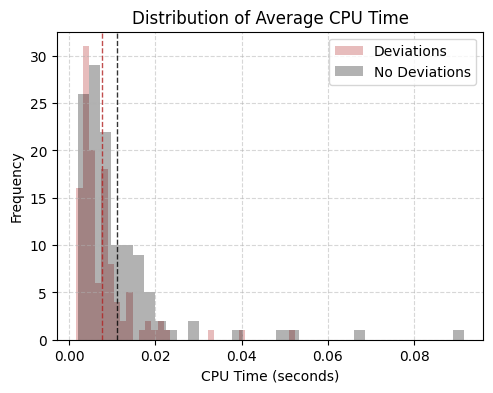

In [240]:
# plot the distribution of the average cpu time
plt.figure(figsize=(5.5,4) , dpi=100)
plt.hist(cpu_times['average cpu time'], bins=35, color='firebrick', alpha=0.3, label='Deviations')
plt.hist(cpu_times_no_dev['average cpu time'], bins=35, color='black', alpha=0.3, label='No Deviations')
plt.axvline(x=average_average_cpu_time, color='firebrick', linestyle='--', linewidth=1, alpha=0.8)
plt.axvline(x=average_average_cpu_time_no_dev, color='black', linestyle='--', linewidth=1, alpha=0.8)
plt.xlabel('CPU Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Average CPU Time')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig('cpu_time_distribution.pdf', format='pdf')
plt.show()

In [241]:
average_cpu_time_log = np.log(average_cpu_time)
average_cpu_time_no_dev_log = np.log(average_cpu_time_no_dev)

# U-Test
u_stat, p_value_non_param = stats.mannwhitneyu(average_cpu_time_log, average_cpu_time_no_dev_log)
print(f'U-Statistic: {u_stat}')
print(f'P-Value (non-parametric): {p_value_non_param}')

alpha = 0.05 # significance level
if p_value_non_param < alpha:
    print("Reject the null hypothesis. There is a SIGNIFICANT DIFFERENCE between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is NO SIGNIFICANT DIFFERENCE between the two groups.")

U-Statistic: 5385.0
P-Value (non-parametric): 0.0005320930080145772
Reject the null hypothesis. There is a SIGNIFICANT DIFFERENCE between the two groups.


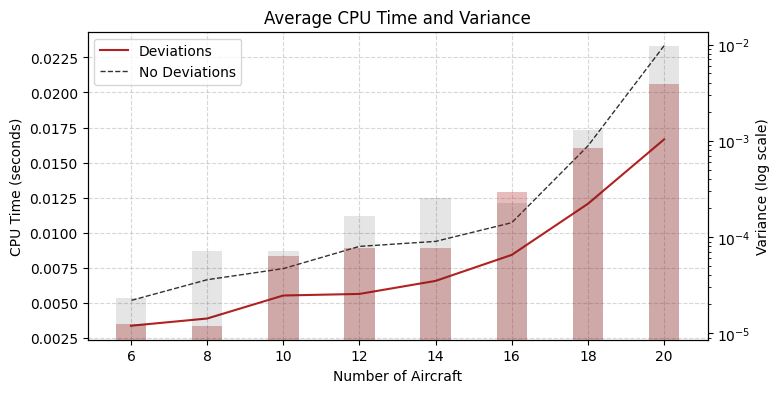

In [242]:
fig, ax1 = plt.subplots(figsize=(8,4), dpi=100)
ax1.plot(final_df['number of aircraft'], final_df['average cpu time'], color='firebrick', label='Deviations')
ax1.plot(final_df_no_dev['number of aircraft'], final_df_no_dev['average cpu time'], color='black', alpha=0.8, linewidth=1, linestyle = "--", label='No Deviations')
ax1.set_xlabel('Number of Aircraft')
ax1.set_ylabel('CPU Time (seconds)')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_title('Average CPU Time and Variance')
ax1.legend()

ax2 = ax1.twinx()
ax2.set_yscale('log')
ax2.bar(final_df['number of aircraft'], final_df['variance'], color='firebrick', alpha=0.3)
ax2.bar(final_df_no_dev['number of aircraft'], final_df_no_dev['variance'], color='black', alpha=0.1)
ax2.set_ylabel('Variance (log scale)')
plt.savefig('CPU_time_and_variance.pdf', format='pdf')

plt.show()

**COST OF REPLANNING**

In [271]:
cor_dev = cpu_times['cost of replanning']
cor_no_dev = cpu_times_no_dev['cost of replanning']

# Characterisitcs of the data
mean_value_dev = cor_dev.mean()
var_value_dev = cor_dev.var()
std_dev_dev = cor_dev.std()

# Characterisitcs of the benchmark data
mean_value_no_dev = cor_no_dev.mean()
var_value_no_dev = cor_no_dev.var()
std_dev_no_dev = cor_no_dev.std()

print("With Deviations")
print(f'Mean Cost of Replanning: {mean_value_dev}')
print(f'Variance: {var_value_dev}')
print(f'Standard Deviation: {std_dev_dev}')
print("\n")
print("Without Deviations")
print(f'Mean Cost of Replanning (No Deviations): {mean_value_no_dev}')
print(f'Variance (No Deviations): {var_value_no_dev}')
print(f'Standard Deviation (No Deviations): {std_dev_no_dev}')


With Deviations
Mean Cost of Replanning: 8.0
Variance: 82.10084033613445
Standard Deviation: 9.060951403474938


Without Deviations
Mean Cost of Replanning (No Deviations): 5.776859504132231
Variance (No Deviations): 47.10812672176308
Standard Deviation (No Deviations): 6.863536021742953


With Deviations
Mean Cost of Replanning: 13.266666666666667
Variance: 92.40225988700567
Standard Deviation: 9.612609421328095


Without Deviations
Mean Cost of Replanning (No Deviations): 8.806451612903226
Variance (No Deviations): 59.338974087784244
Standard Deviation (No Deviations): 7.703179479136147


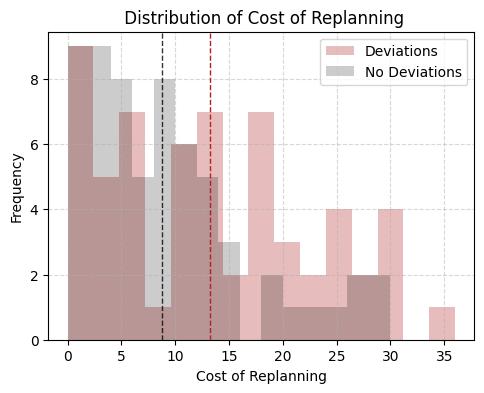

In [272]:
cor_dev = cpu_times[cpu_times['number of aircraft'] >= 14]['cost of replanning']
cor_no_dev = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] >= 14]['cost of replanning']
mean_cor_dev = cor_dev.mean()
mean_cor_no_dev = cor_no_dev.mean()

# Characterisitcs of the data
mean_value_dev = cor_dev.mean()
var_value_dev = cor_dev.var()
std_dev_dev = cor_dev.std()

# Characterisitcs of the benchmark data
mean_value_no_dev = cor_no_dev.mean()
var_value_no_dev = cor_no_dev.var()
std_dev_no_dev = cor_no_dev.std()

print("With Deviations")
print(f'Mean Cost of Replanning: {mean_value_dev}')
print(f'Variance: {var_value_dev}')
print(f'Standard Deviation: {std_dev_dev}')
print("\n")
print("Without Deviations")
print(f'Mean Cost of Replanning (No Deviations): {mean_value_no_dev}')
print(f'Variance (No Deviations): {var_value_no_dev}')
print(f'Standard Deviation (No Deviations): {std_dev_no_dev}')

# plot to see if the two groups are normally distributed
plt.figure(figsize=(5.5,4), dpi=100)
plt.hist(cor_dev, bins=15, alpha=0.3, label='Deviations', color='firebrick')
plt.hist(cor_no_dev, bins=15, alpha=0.2, label='No Deviations', color='black')
plt.axvline(x=mean_cor_dev, color='firebrick', linestyle='--', linewidth=1)
plt.axvline(x=mean_cor_no_dev, color='black', linestyle='--', linewidth=1, alpha=0.8)
plt.legend(loc='upper right')
plt.xlabel('Cost of Replanning')
# plt.xlim(2,40)
# plt.ylim(0, 12)
plt.ylabel('Frequency')
plt.title(' Distribution of Cost of Replanning')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('cost_of_replanning_distribution.pdf', format='pdf')

plt.show()


In [262]:
# The data for the cost of replanning is not normally distributed. Therefore I will be using a 
# non-parametric test (Mann-Whitney U Test) to compare the two groups.

print("Mann-Whitney U-Test to see if there is a significant difference in the cost of replanning between the two groups.")

# Initialise the data groups
# cor_no_dev = cpu_times_no_dev[cpu_times_no_dev['number of aircraft'] >= 14]['cost of replanning']
# cor_dev = cpu_times[cpu_times['number of aircraft'] >= 14]['cost of replanning']

# log transformation
cor_dev_log = np.log(cor_dev)
cor_no_dev_log = np.log(cor_no_dev)

# U-Test
u_stat, p_value_non_param = stats.mannwhitneyu(cor_dev_log, cor_no_dev_log)
print(f'U-Statistic: {u_stat}')
print(f'P-Value (non-parametric): {p_value_non_param}')

alpha = 0.05 # significance level
if p_value_non_param < alpha:
    print("Reject the null hypothesis. There is a SIGNIFICANT DIFFERENCE between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is NO SIGNIFICANT DIFFERENCE between the two groups.")


Mann-Whitney U-Test to see if there is a significant difference in the cost of replanning between the two groups.
U-Statistic: 2363.5
P-Value (non-parametric): 0.009908349229748101
Reject the null hypothesis. There is a SIGNIFICANT DIFFERENCE between the two groups.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


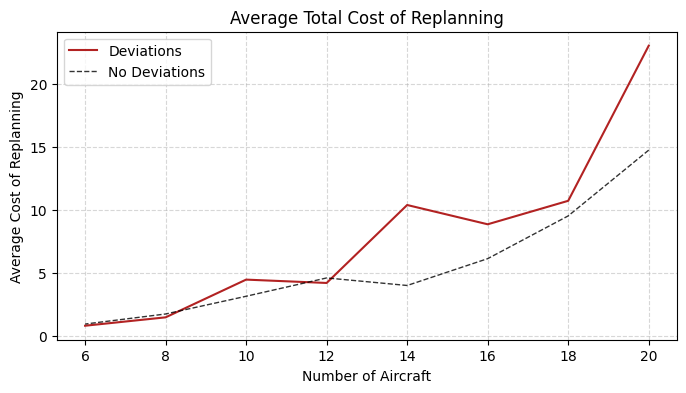

In [263]:
plt.figure(figsize=(8,4), dpi=100)
plt.plot(final_df['number of aircraft'], final_df['cost of replanning'], color='firebrick', label='Deviations')
plt.plot(final_df_no_dev['number of aircraft'], final_df_no_dev['cost of replanning'], color='black', alpha=0.8, linewidth=1, linestyle = "--", label='No Deviations')
plt.xlabel('Number of Aircraft')
plt.ylabel('Average Cost of Replanning')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Average Total Cost of Replanning')
plt.legend()
plt.savefig('avg_cost_of_replanning.pdf', format='pdf')

plt.show()

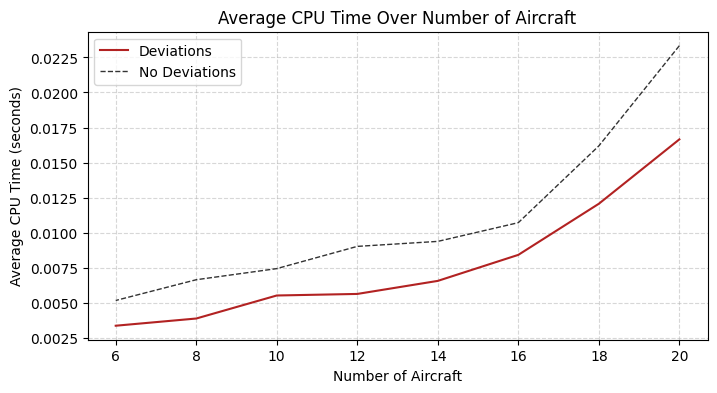

In [264]:
# plot the average cpu time over number of aircraft
plt.figure(figsize=(8,4), dpi=100)
plt.plot(final_df['number of aircraft'], final_df['average cpu time'], color='firebrick', label='Deviations')
plt.plot(final_df_no_dev['number of aircraft'], final_df_no_dev['average cpu time'], color='black', alpha=0.8, linewidth=1, linestyle = "--", label='No Deviations')
plt.xlabel('Number of Aircraft')
plt.ylabel('Average CPU Time (seconds)')
plt.title('Average CPU Time Over Number of Aircraft')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig('avg_cpu_time_no_dev.pdf', format='pdf')

plt.show()

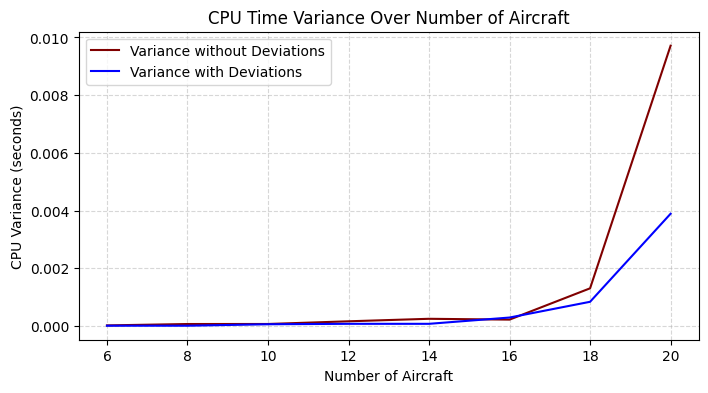

In [265]:

plt.figure(figsize=(8,4), dpi=100)
plt.plot(final_df_no_dev['number of aircraft'], final_df_no_dev['variance'], color='maroon', label='Variance without Deviations')
plt.plot(final_df['number of aircraft'], final_df['variance'], color='blue', label='Variance with Deviations')
plt.xlabel('Number of Aircraft')
plt.ylabel('CPU Variance (seconds)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('CPU Time Variance Over Number of Aircraft')
plt.legend()
plt.show()


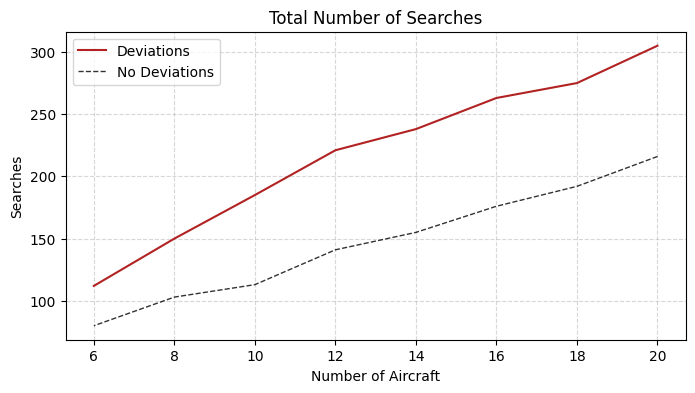

In [268]:
plt.figure(figsize=(8,4), dpi=100)
plt.plot(final_df['number of aircraft'], final_df['number of replannings'], color='firebrick', label='Deviations')
plt.plot(final_df_no_dev['number of aircraft'], final_df_no_dev['number of replannings'], color='black', alpha=0.8, linewidth=1, linestyle = "--", label='No Deviations')
plt.xlabel('Number of Aircraft')
plt.grid(True, linestyle="--", alpha=0.5)
plt.ylabel('Searches')
plt.title('Total Number of Searches')
plt.legend()
plt.savefig('num_replannings.pdf', format='pdf')
plt.show()

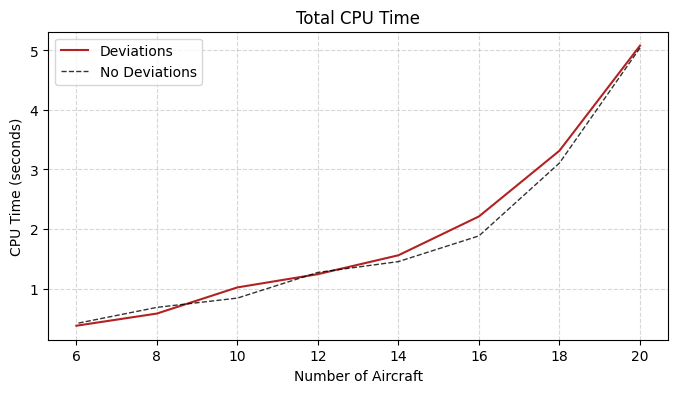

In [267]:
# multiply the total number of plannings by the average cpu time for each group
final_df['total_cpu_time'] = final_df['number of replannings'] * final_df['average cpu time']
final_df_no_dev['total_cpu_time'] = final_df_no_dev['number of replannings'] * final_df_no_dev['average cpu time']

plt.figure(figsize=(8,4), dpi=100)
plt.plot(final_df['number of aircraft'], final_df['total_cpu_time'], color='firebrick', label='Deviations')
plt.plot(final_df_no_dev['number of aircraft'], final_df_no_dev['total_cpu_time'], color='black', alpha=0.8, linewidth=1, linestyle = "--", label='No Deviations')
plt.xlabel('Number of Aircraft')
plt.ylabel('CPU Time (seconds)')
plt.title('Total CPU Time')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig('total_cpu_time_no_dev.pdf', format='pdf')
plt.show()



In [251]:
tally1 = 0

for i in range(6, 21, 2):
    tally1 += i * 15

tally2 = 0

for i in range(6, 21, 2):
    tally2 += i * 2 * 15


print("Maximum number of plannings with deviations: ", tally2)
print("Maximum number of plannings without deviations: ", tally1)

Maximum number of plannings with deviations:  3120
Maximum number of plannings without deviations:  1560


In [252]:
### MERGE SORT TO PROVE A POINT ###

import random

def merge_sort(unsorted):
    if len(unsorted) <= 1:
        return unsorted 
    
    pin = len(unsorted) // 2  
    left = merge_sort(unsorted[:pin])  
    right = merge_sort(unsorted[pin:])  
    
    result = []
    i = 0
    j = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])

    return result

for i in range(5):
    unsorted = [random.randint(1, 1000) for _ in range(200)]
    print(f"\nUnsorted: {unsorted}")
    print(f"Sorted:{merge_sort(unsorted)}")

# created in 4min 52s


Unsorted: [903, 120, 806, 387, 880, 44, 536, 983, 879, 496, 980, 34, 697, 204, 749, 590, 341, 238, 24, 235, 266, 7, 918, 636, 330, 520, 57, 34, 395, 27, 29, 23, 204, 161, 586, 300, 25, 989, 185, 145, 653, 476, 802, 333, 242, 833, 824, 226, 6, 277, 407, 366, 568, 659, 268, 275, 530, 641, 441, 720, 160, 648, 812, 974, 860, 780, 987, 427, 702, 398, 626, 123, 217, 326, 354, 54, 930, 618, 735, 762, 673, 965, 421, 760, 961, 168, 809, 409, 684, 314, 634, 385, 560, 841, 851, 549, 731, 584, 256, 328, 639, 989, 507, 93, 824, 368, 907, 501, 837, 237, 84, 292, 336, 29, 526, 672, 327, 197, 249, 553, 205, 213, 308, 661, 515, 679, 55, 383, 919, 905, 195, 119, 268, 404, 204, 929, 160, 126, 395, 350, 109, 64, 420, 377, 636, 699, 484, 933, 808, 313, 993, 655, 106, 877, 712, 960, 193, 463, 182, 569, 480, 954, 73, 758, 192, 255, 823, 711, 829, 945, 299, 120, 944, 475, 834, 515, 862, 363, 155, 464, 927, 343, 970, 435, 992, 794, 321, 455, 817, 523, 36, 569, 704, 206, 252, 820, 552, 487, 839, 896]
Sorted:[6

In [273]:
from PIL import Image

# Load the image
image_path = "Screenshot 2024-06-27 at 22.19.24.png"
image = Image.open(image_path)

# Convert to RGBA (if not already in that mode)
image = image.convert("RGBA")

# Get data
data = image.getdata()

# Create a new image with transparent background
new_data = []
for item in data:
    # Change all white (also shades of whites) pixels to transparent
    if item[0] > 200 and item[1] > 200 and item[2] > 200:
        new_data.append((255, 255, 255, 0))
    else:
        new_data.append(item)

# Update image data
image.putdata(new_data)

# Save the image with transparent background
output_path = "airport_layout_transparent.png"
image.save(output_path)

print(f"Image saved to {output_path}")

Image saved to airport_layout_transparent.png
